In [1]:
import os

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras import optimizers
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [2]:
keras.__version__

'2.3.1'

In [3]:
# 分類クラス
classes = ['daisy', 'dandelion','rose','sunflower','tulip']
nb_classes = len(classes)
batch_size_for_data_generator = 20

base_dir = "./"

test_dir = os.path.join(base_dir, 'test_images')

test_daisy_dir = os.path.join(test_dir, 'daisy')
test_dandelion_dir = os.path.join(test_dir, 'dandelion')
test_rose_dir = os.path.join(test_dir, 'rose')
test_sunflower_dir = os.path.join(test_dir, 'sunflower')
test_tulip_dir = os.path.join(test_dir, 'tulip')

# 画像サイズ
img_rows, img_cols = 100, 100

In [4]:
input_tensor = Input(shape=(img_rows, img_cols, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)
#vgg16.summary()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
top_model = Sequential()
top_model.add(Flatten(input_shape=vgg16.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(nb_classes, activation='softmax'))
model = Model(inputs=vgg16.input, outputs=top_model(vgg16.output))
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

In [6]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])

In [7]:
#hdf5_file = os.path.join(base_dir, 'flower-model.hdf5')
#model.load_weights(hdf5_file)

In [8]:
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

In [10]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

In [11]:
filename = os.path.join(test_dir, 'sunflower')
filename = os.path.join(filename, 'sunflower.jpg')
print(filename)

./test_images\sunflower\sunflower.jpg


In [12]:
#from PIL import Image

In [13]:
#img = np.array(Image.open(filename))
#plt.imshow(img)

In [14]:
img = load_img(filename, target_size=(img_rows,img_cols))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

predict = model.predict(preprocess_input(x))
for pre in predict:
    y = pre.argmax()
    print("test result=",classes[y], pre)

test result= rose [1.22684335e-20 4.07375026e-19 9.97803509e-01 1.52472113e-09
 2.19652685e-03]


In [15]:
layer_outputs = [layer.output for layer in model.layers[2:19]]
layer_outputs

[<tf.Tensor 'block1_conv2/Relu:0' shape=(?, 100, 100, 64) dtype=float32>,
 <tf.Tensor 'block1_pool/MaxPool:0' shape=(?, 50, 50, 64) dtype=float32>,
 <tf.Tensor 'block2_conv1/Relu:0' shape=(?, 50, 50, 128) dtype=float32>,
 <tf.Tensor 'block2_conv2/Relu:0' shape=(?, 50, 50, 128) dtype=float32>,
 <tf.Tensor 'block2_pool/MaxPool:0' shape=(?, 25, 25, 128) dtype=float32>,
 <tf.Tensor 'block3_conv1/Relu:0' shape=(?, 25, 25, 256) dtype=float32>,
 <tf.Tensor 'block3_conv2/Relu:0' shape=(?, 25, 25, 256) dtype=float32>,
 <tf.Tensor 'block3_conv3/Relu:0' shape=(?, 25, 25, 256) dtype=float32>,
 <tf.Tensor 'block3_pool/MaxPool:0' shape=(?, 12, 12, 256) dtype=float32>,
 <tf.Tensor 'block4_conv1/Relu:0' shape=(?, 12, 12, 512) dtype=float32>,
 <tf.Tensor 'block4_conv2/Relu:0' shape=(?, 12, 12, 512) dtype=float32>,
 <tf.Tensor 'block4_conv3/Relu:0' shape=(?, 12, 12, 512) dtype=float32>,
 <tf.Tensor 'block4_pool/MaxPool:0' shape=(?, 6, 6, 512) dtype=float32>,
 <tf.Tensor 'block5_conv1/Relu:0' shape=(?, 6

In [16]:
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activation_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

In [17]:
img = load_img(filename, target_size=(img_rows, img_cols))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
img_tensor = x/255.
print(img_tensor.shape)

(1, 100, 100, 3)


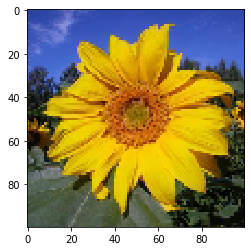

In [18]:
plt.imshow(img_tensor[0])
plt.show()

In [19]:
activations = activation_model.predict(img_tensor)

In [20]:
print(len(activations))
print(activations)

17
[array([[[[3.8244858 , 0.22611232, 0.        , ..., 2.1557112 ,
          3.0882564 , 1.4133306 ],
         [1.2435111 , 0.44127724, 0.        , ..., 3.624738  ,
          1.9863839 , 1.4658315 ],
         [1.532329  , 0.51398283, 0.        , ..., 3.691443  ,
          1.0541111 , 1.3626642 ],
         ...,
         [1.4927089 , 0.48552483, 0.        , ..., 3.7621899 ,
          1.0064688 , 1.3224683 ],
         [0.60182714, 0.        , 0.        , ..., 3.433497  ,
          1.8888868 , 1.4229848 ],
         [0.        , 0.        , 0.        , ..., 2.1408677 ,
          0.        , 0.2064361 ]],

        [[1.902731  , 0.2833604 , 0.        , ..., 3.4821687 ,
          2.1429372 , 0.5249699 ],
         [0.        , 0.2789048 , 0.15994644, ..., 5.5254135 ,
          3.3036876 , 0.2564423 ],
         [0.38610068, 0.46128023, 0.        , ..., 5.6266284 ,
          2.245539  , 0.27285552],
         ...,
         [0.40783665, 0.39148235, 0.        , ..., 5.6985006 ,
          2.3307822 ,

In [21]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 100, 100, 64)


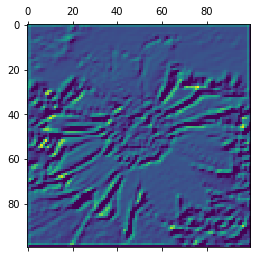

In [28]:
#最初の畳み込み層の出力(4ch)
plt.matshow(first_layer_activation[0, :, :, 10], cmap='viridis')
plt.show()

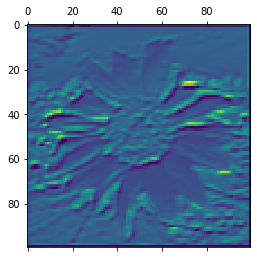

In [23]:
#最初の畳み込み層の出力(63ch)
plt.matshow(first_layer_activation[0, :, :, 63], cmap='viridis')
plt.show()

In [30]:
four_layer_activation = activations[3]
print(four_layer_activation.shape)

(1, 50, 50, 128)


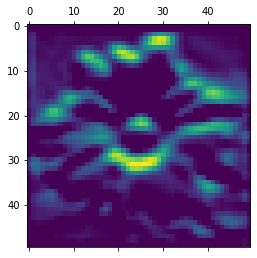

In [31]:
#最初の畳み込み層の出力(63ch)
plt.matshow(four_layer_activation[0, :, :, 63], cmap='viridis')
plt.show()

In [24]:
#最後の畳み込み層の活性化を可視化する
last_layer_activation = activations[16]
print(last_layer_activation.shape)

(1, 3, 3, 512)


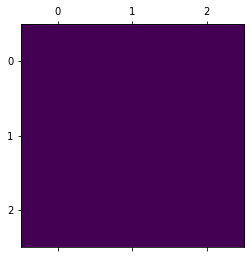

In [25]:
#最後の畳み込み層の出力(0ch)
plt.matshow(last_layer_activation[0, :, :, 0], cmap='viridis')
plt.show()

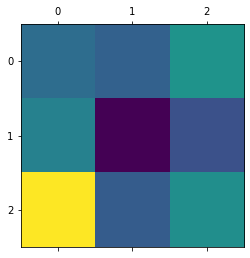

In [26]:
#最後の畳み込み層の出力(510ch)
plt.matshow(last_layer_activation[0, :, :, 510], cmap='viridis')
plt.show()